# 0.0 IMPORTS

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
!pip install import-ipynb

In [3]:
import pandas as pd
!pip install inflection
import inflection
import math
import numpy as np
import seaborn as sns
from IPython.core.display import HTML
from IPython.display import Image
#%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-white')

import datetime
#import import-ipynb #import-ipynb

# 0.1 Helper Functions

In [4]:
#!pip install inflection==0.5.1

In [5]:
!pip freeze | grep inflec

inflection==0.5.1


In [6]:
#import-ipynb
!pip freeze | grep import-ipynb

import-ipynb==0.1.4


## 0.1 Helper Functions

In [7]:
def jupyter_settings():
    %matplotlib inline
    #%pylab inline

    plt.style.use('bmh')
    plt.rcParams['figure.figsize']=[25,12]
    plt.rcParams['font.size']=24

    display(HTML('<style>.container {width:100% !important;}</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)

    sns.set()

In [8]:
jupyter_settings()

# 0.2 Loading Data

In [9]:
!ls ../Rossmann-Store-Sales-Prediction/dataset/store.csv

../Rossmann-Store-Sales-Prediction/dataset/store.csv


In [10]:
!ls ../data_set/stores.csv

../data_set/stores.csv


In [11]:
# print("read_csv("data_set/stores.csv)")
# pd.read_csv("Rossmann-Store-Sales-Prediction/dataset/train.csv", low_memory=False)
#df_sales_raw=pd.read_csv("Rossmann-Store-Sales-Prediction/dataset/train.csv", low_memory=False)

#pd.read_csv("Rossmann-Store-Sales-Prediction/dataset/store.csv", low_memory=False)
#pd.read_csv("../dataset/stores.csv", low_memory=False)
df_train_raw=pd.read_csv("../Rossmann-Store-Sales-Prediction/dataset/train.csv", low_memory=False)
#df_train_raw=pd.read_csv("/content/drive/MyDrive/dataset/train.csv", low_memory=False)
df_store_raw=pd.read_csv("../Rossmann-Store-Sales-Prediction/dataset/store.csv", low_memory=False)
#df_store_raw=pd.read_csv("/content/drive/MyDrive/dataset/store.csv", low_memory=False)
#df_store_raw=pd.read_csv("../Rossmann-Store-Sales-Prediction/dataset/stores.csv", low_memory=False)
# /home/cab/ds_in_deploy/Rossmann-Store-Sales-Prediction/dataset

In [12]:
df_train_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id
527619,1010,7,2014-03-02,0,0,0,0,0,0,740827


In [13]:
df_store_raw.sample()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1012,1013,a,a,630.0,2.0,2015.0,1,31.0,2013.0,"Feb,May,Aug,Nov"


In [14]:
df_train_raw.shape #(1001599, 10)
df_train_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id
24160,746,5,2015-06-26,4973,491,1,0,0,0,302759


In [15]:
df_store_raw.shape #(1115, 10)
df_store_raw.sample()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
338,339,a,c,2280.0,NaN,NaN,1,10.0,2013.0,"Mar,Jun,Sept,Dec"


In [16]:
#df_sales_raw # 1001599 rows × 10 columns
df_store_raw # 1115 rows × 10 columns

# arquivo_referencia, anexado a referencia, como faremos o merge, a coluna igual nos dois
df_raw=pd.merge(df_train_raw, df_store_raw, how='left', on='Store') #1001599 rows × 19 columns

# so alterou o numero de colunas
df_raw.shape #(1001599, 19)

(1001599, 19)

In [17]:
df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
913226,827,4,2013-03-21,9004,1189,1,1,0,0,503505,a,c,250.0,1.0,2005.0,0,NaN,NaN,NaN


# 1.0. PASSO 01 - DESCRIÇÃO DOS DADOS

## 1.1 Rename Columns

In [18]:
# fazendo uma copia da seccao anterior
df1=df_raw.copy()
#list(df1.columns)

In [19]:
cols_old=list(df1.columns)
cols_old #.list()

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'Id',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [20]:
snakecase = lambda x: inflection.underscore(x)
#mapeando a função
cols_new = list(map(snakecase, cols_old))
#rename
df1.columns=cols_new
#cols_new

## 1.2 Data Dimensions

In [21]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 1001599
Number of Cols: 19


## 1.3 Data Types

In [22]:
df1.dtypes
df1['date']=pd.to_datetime(df1['date'])
#df1.dtypes

## 1.4 Check NA

In [23]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
id                                   0
store_type                           0
assortment                           0
competition_distance              2600
competition_open_since_month    318392
competition_open_since_year     318392
promo2                               0
promo2_since_week               500415
promo2_since_year               500415
promo_interval                  500415
dtype: int64

## 1.5 Fillout NA

In [24]:
df1.sample().T

,845610
store,111
day_of_week,1
date,2013-05-20 00:00:00
sales,0
customers,0
open,0
promo,0
state_holiday,a
school_holiday,0
id,466418


In [25]:
atributo='competition_open_since_month'
df1[atributo]= df1.apply(lambda x: x['date'].month if math.isnan(x[atributo]) else x[atributo], axis=1) #axis=1 aplicando ao longo das colunas

In [26]:
atributo='competition_open_since_year'
df1[atributo]= df1.apply(lambda x: x['date'].year if math.isnan(x[atributo]) else x[atributo], axis=1) #axis=1 aplicando ao longo das colunas

In [27]:
atributo='promo2_since_week'
df1[atributo]= df1.apply(lambda x: x['date'].week if math.isnan(x[atributo]) else x[atributo], axis=1) #axis=1 aplicando ao longo das colunas

In [28]:
atributo='promo2_since_year'
df1[atributo]= df1.apply(lambda x: x['date'].year if math.isnan(x[atributo]) else x[atributo], axis=1) #axis=1 aplicando ao longo das colunas

In [29]:
#competition_distance              2600
#print(df1[1])
#df1['competition_distance'] =df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)

#competition_open_since_month    318392
# se for verdade extraimos o mes
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].moth if math.isnan( x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)
print('done')
df1.sample(10)
#competition_open_since_year     318392
#atributo='competition_open_since_year'
#df1[atributo] = df1.apply(lambda x: x['date'].year if math.isnan( x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)

#promo2_since_week               500415
#promo2_since_year               500415
#promo_interval                  500415

done


,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,id,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
606502,728,6,2013-12-21,7421,606,1,0,0,0,88191,d,a,13990.0,12.0,2013.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
392049,217,2,2014-07-01,6425,759,1,1,0,0,497929,c,a,3150.0,7.0,2014.0,0,27.0,2014.0,NaN
497410,906,6,2014-03-29,8200,1093,1,0,0,0,447092,a,a,90.0,7.0,2010.0,0,13.0,2014.0,NaN
413097,218,4,2014-06-12,4846,731,1,0,0,1,806795,a,c,640.0,6.0,2014.0,1,9.0,2011.0,"Mar,Jun,Sept,Dec"
502457,378,1,2014-03-24,5164,877,1,0,0,0,809531,a,c,2140.0,8.0,2012.0,0,13.0,2014.0,NaN
801750,851,6,2013-06-29,6507,517,1,0,0,0,138707,d,c,2330.0,6.0,2013.0,1,49.0,2014.0,"Mar,Jun,Sept,Dec"
8884,1080,5,2015-07-10,9938,871,1,0,0,0,352950,a,a,2410.0,7.0,2015.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"
451526,737,5,2014-05-09,6239,939,1,1,0,0,104549,a,a,100.0,5.0,2007.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
268925,562,1,2014-11-10,21477,3401,1,1,0,0,356144,b,c,1210.0,11.0,2014.0,0,46.0,2014.0,NaN
504945,636,6,2014-03-22,5036,646,1,0,0,0,1010309,c,a,720.0,10.0,2004.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [30]:
#promo_interval                  500415
month_map = {1:'Jan', 2:'Fev', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df1['promo_interval'].fillna(0, inplace=True) # fazendo modificação directa na coluna
#criando a coluna month_map, que indica o mês que ocorreu a venda
df1['month_map'] = df1['date'].dt.month.map(month_map) # os numeros serão trocados pelas letras
# A venda foi realizada num mês promocional
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)
# criando lista dos elementos da coluna promo_interval e verificar se month_map está dentro da lista do intervalo

In [31]:
df1[['date', 'month_map']].sample(12)

,date,month_map
378338,2014-07-16,Jul
495932,2014-03-30,Mar
220284,2015-01-01,Jan
256391,2014-11-23,Nov
651924,2013-11-10,Nov
259204,2014-11-20,Nov
69382,2015-05-16,May
664373,2013-10-30,Oct
688374,2013-10-08,Oct
420435,2014-06-06,Jun


## 1.6 Check Type

In [32]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
id                                       int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [33]:

#competition_open_since_month           float64
atributo='competition_open_since_month'
df1[atributo]=df1[atributo].astype(int)
#competition_open_since_year            float64
atributo='competition_open_since_year'
df1[atributo]=df1[atributo].astype(int)
#promo2_since_week                      float64
atributo='promo2_since_week'
df1[atributo]=df1[atributo].astype(int)
#promo2_since_year                      float64
atributo='promo2_since_year'
df1[atributo]=df1[atributo].astype(int)

## 1.7 Descriptive Statistical, ganhando conhecimento do negocio e detectar alguns erros

In [34]:
num_attributes = df1.select_dtypes(include=['int64', 'float64']) # todos os atributos sao de variavel numerica
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]']) #include=['object']
obj_attributes = df1.select_dtypes(include=['object']) #include=['object']

In [35]:
cat_attributes.sample(2)

,state_holiday,store_type,assortment,promo_interval,month_map
52533,0,a,a,"Jan,Apr,Jul,Oct",May
231647,0,a,a,0,Dec


In [36]:
obj_attributes.sample(2)

,state_holiday,store_type,assortment,promo_interval,month_map
482066,0,d,c,0,Apr
669262,0,d,c,"Jan,Apr,Jul,Oct",Oct


In [37]:
num_attributes.sample() #

,store,day_of_week,sales,customers,open,promo,school_holiday,id,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
9420,501,4,4510,508,1,0,0,863304,1620.0,9,2006,0,28,2015,0


In [38]:
# Central tendency - mean, median
# Dispersion - std, min, max, range, skew, kurtosis

### 1.7.1 Numerical Attributes

In [39]:
# Central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply(np.mean) ).T
ct2 = pd.DataFrame( num_attributes.apply(np.median) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1=pd.DataFrame(num_attributes.apply(np.std)).T
d2=pd.DataFrame(num_attributes.apply(min)).T
d3=pd.DataFrame(num_attributes.apply(max)).T
d4=pd.DataFrame(num_attributes.apply(lambda x: x.max()-x.min())).T
d5=pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6=pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
#nomeando os atributos, as colunas
m.columns=['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.436424,558.0,321.909047,-0.000970,-1.200532
1,day_of_week,1.0,7.0,6.0,3.998315,4.0,1.997349,0.001618,-1.246824
2,sales,0.0,41551.0,41551.0,5770.573039,5741.0,3852.565888,0.643199,1.780100
3,customers,0.0,7388.0,7388.0,633.302988,610.0,464.942753,1.596438,7.073761
4,open,0.0,1.0,1.0,0.829645,1.0,0.375944,-1.753697,1.075454
5,promo,0.0,1.0,1.0,0.381894,0.0,0.485851,0.486181,-1.763631
6,school_holiday,0.0,1.0,1.0,0.173460,0.0,0.378644,1.724790,0.974903
7,id,0.0,1017207.0,1017207.0,508518.856749,508810.0,293464.542300,-0.000361,-1.199537
8,competition_distance,20.0,75860.0,75840.0,5430.478119,NaN,7716.182396,2.928578,12.999457
9,competition_open_since_month,1.0,12.0,11.0,6.781137,7.0,3.319975,-0.039549,-1.241021


seaborn @ file:///home/conda/feedstock_root/build_artifacts/seaborn-split_1696262444380/work


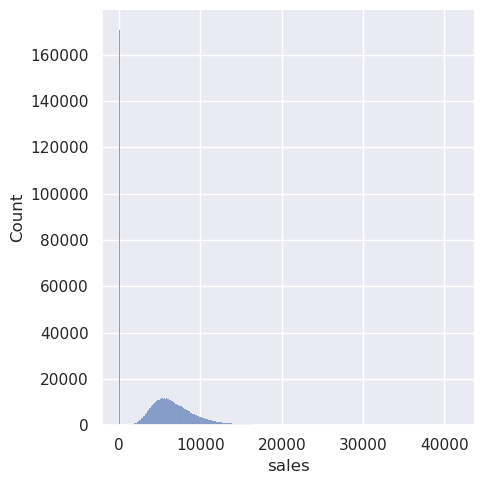

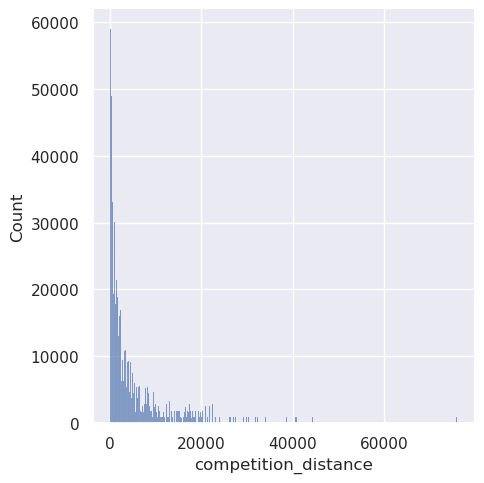

In [40]:
#sns.distplot(df1['sales']) #`distplot` is a deprecated function and will be removed in seaborn v0.14.0.
sns.displot(df1['sales'])
sns.displot(df1['competition_distance'])
!pip freeze | grep seaborn

### 1.7.2 Categorial Attributes

In [41]:
#Quantos niveis cada variável categorica tem? Como aplicar 1 função em todas as colunas?
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

In [42]:
#Quantos niveis cada variável categorica tem? Como aplicar 1 função em todas as colunas?
cat_attributes.apply(lambda x: x.unique())

state_holiday                                          [0, a, b, c]
store_type                                             [c, a, d, b]
assortment                                                [a, c, b]
promo_interval    [0, Jan,Apr,Jul,Oct, Feb,May,Aug,Nov, Mar,Jun,...
month_map         [Jul, Jun, May, Apr, Mar, Fev, Jan, Dec, Nov, ...
dtype: object

In [43]:
# a dimensão das variáveis está muito diferente
# provavel razão, dias fechado tendo vendas igual a zero

<Axes: xlabel='state_holiday', ylabel='sales'>

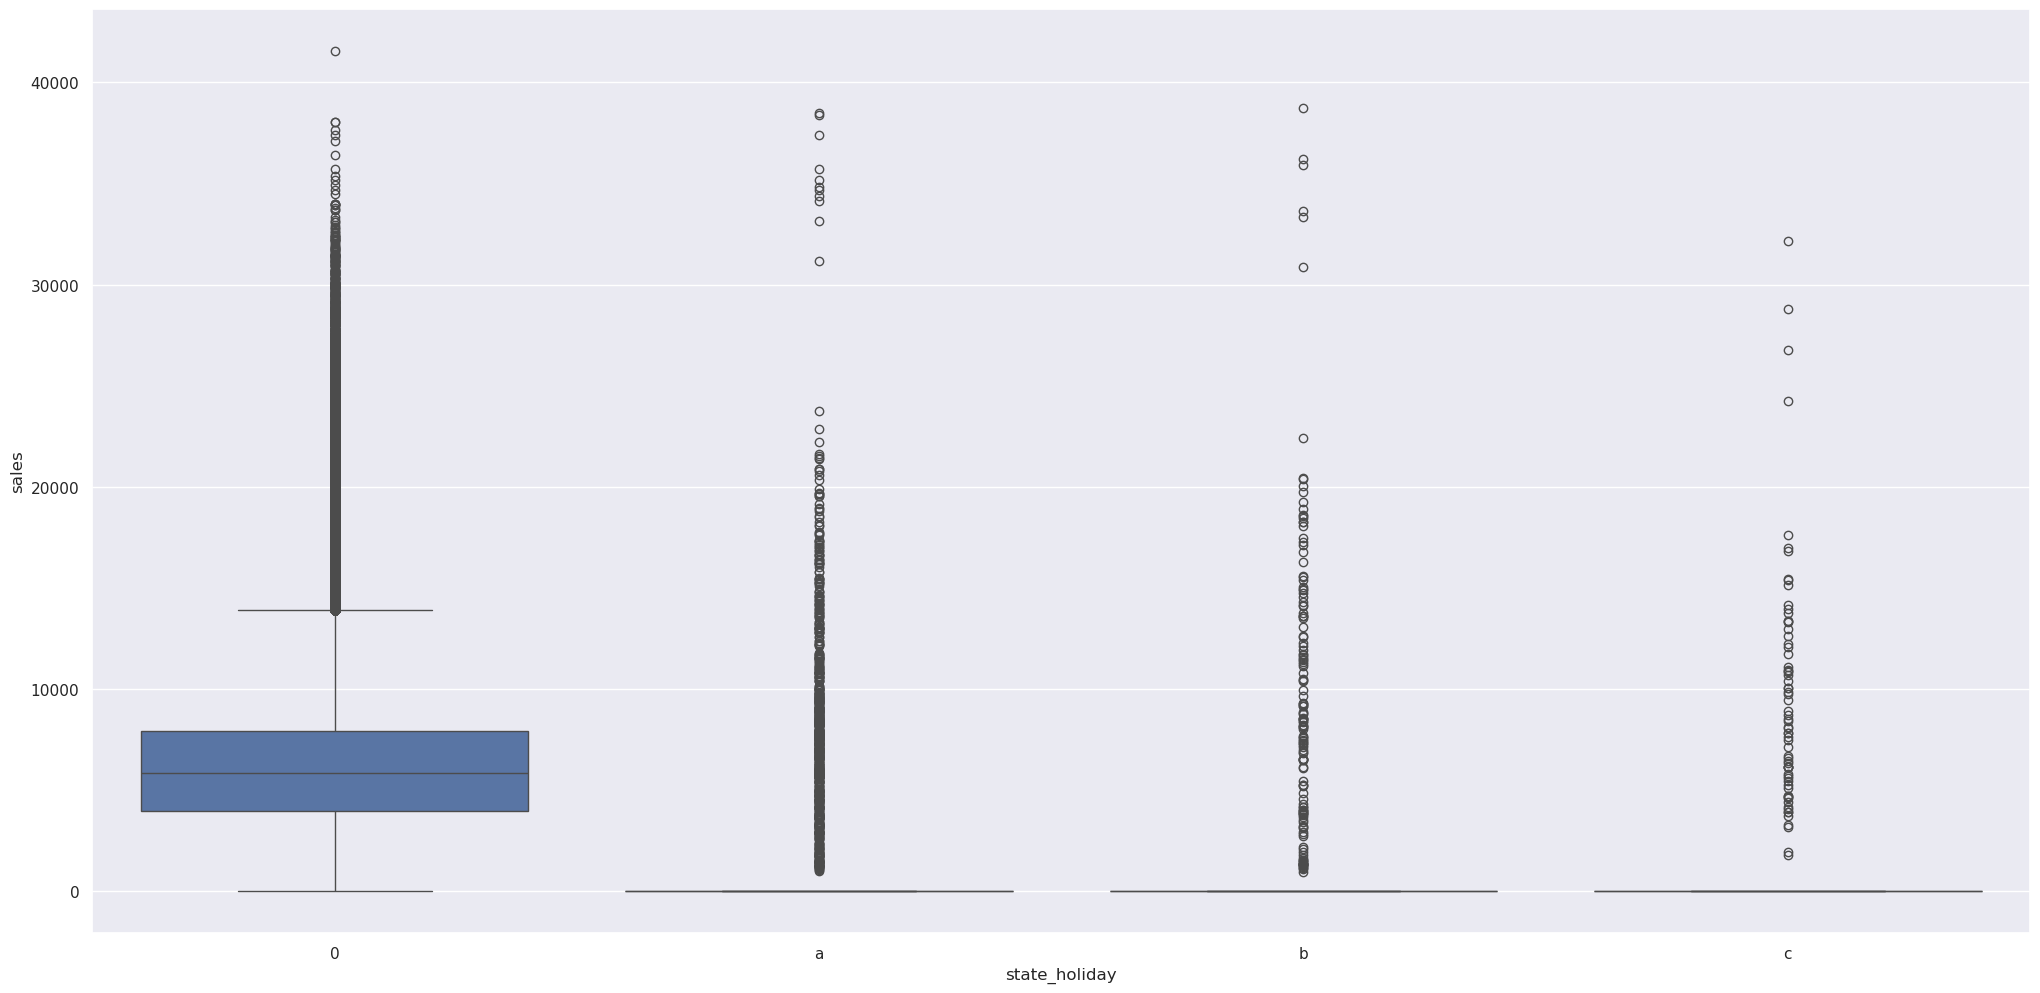

In [44]:
aux1=df1[(df1['state_holiday']!=0) & (df1['sales']>0)]
sns.boxplot(x='state_holiday', y='sales', data=df1)

<Axes: xlabel='assortment', ylabel='sales'>

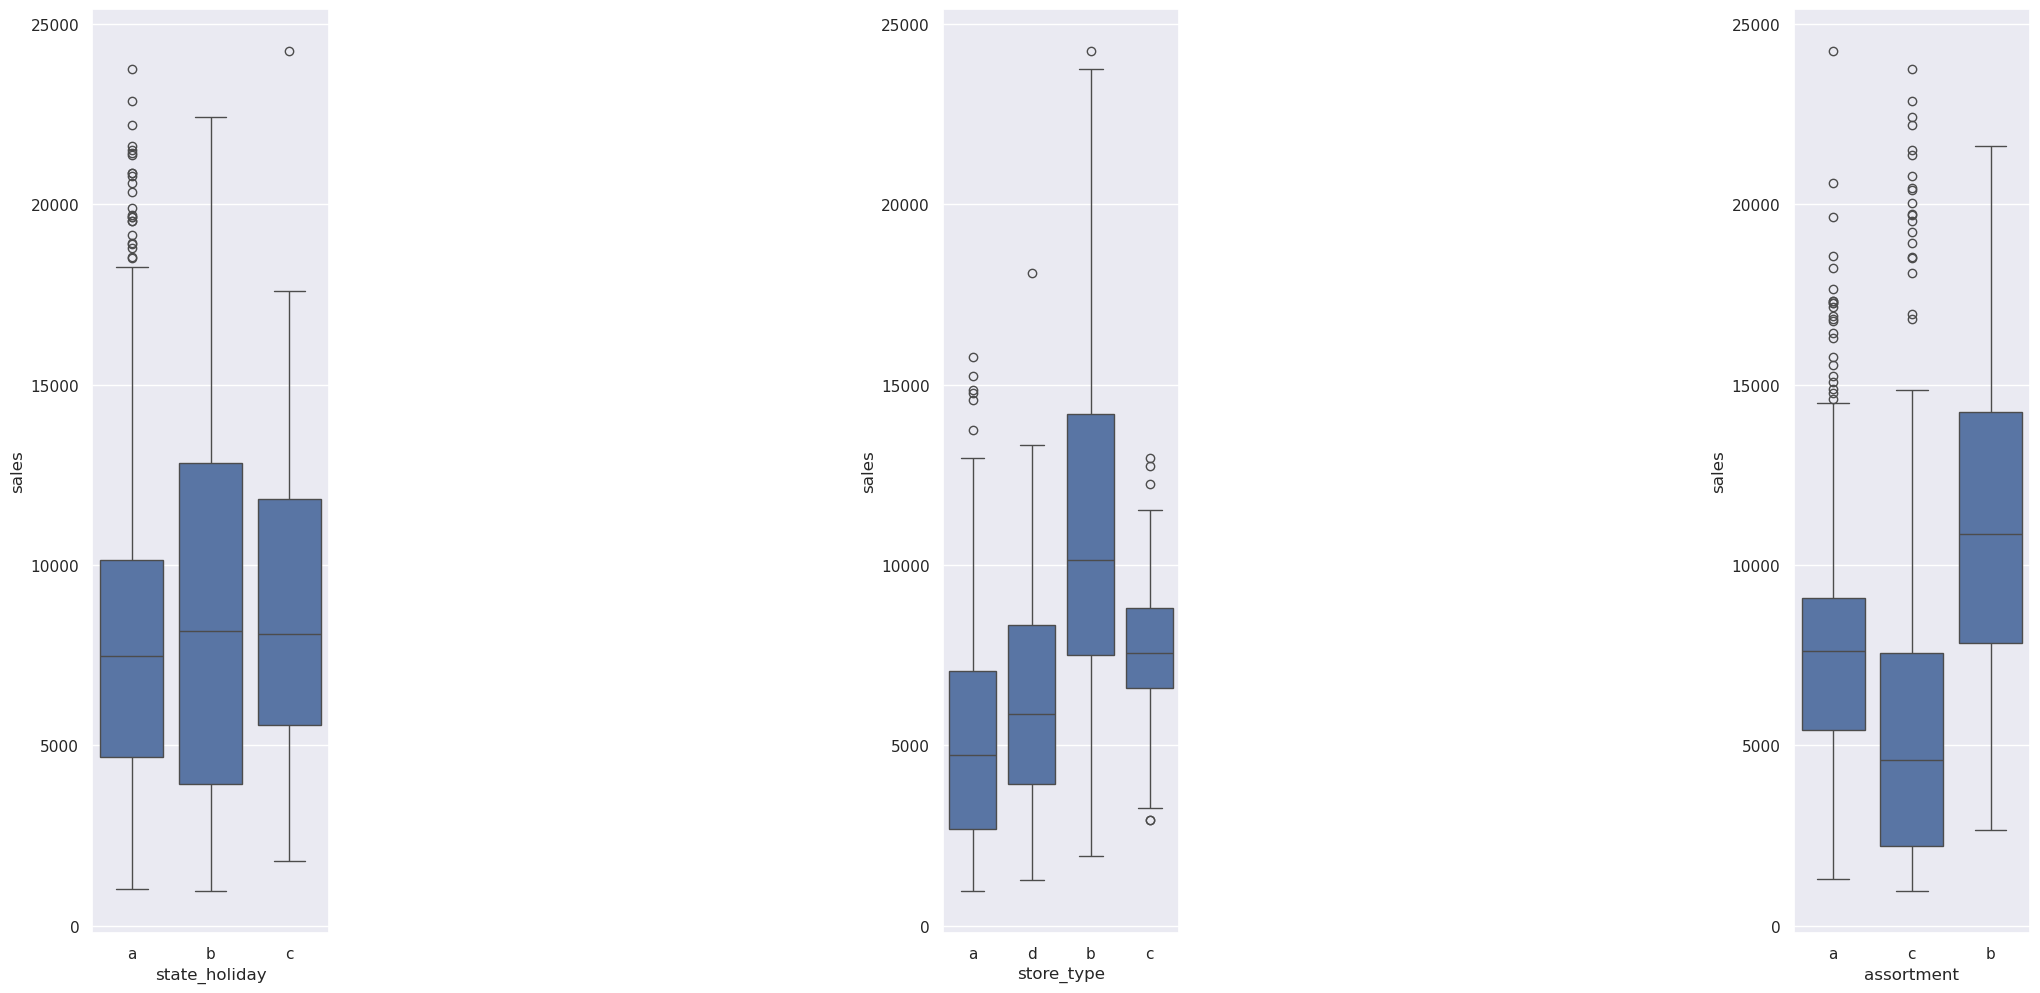

In [45]:
aux1=df1[(df1['state_holiday']!='0') & (df1['sales']>0) & (df1['sales']<25000)] #dia diferente do feriado e com vendas acima de zero

plt.subplot(1,7,1) #1 linha, 3 colunas, na posicão 1
sns.boxplot(x='state_holiday', y='sales', data=aux1)

plt.subplot(1,7,4) #1 linha, 3 colunas, na posicão 2
sns.boxplot(x='store_type', y='sales', data=aux1)

plt.subplot(1,7,7) #1 linha, 3 colunas, na posicão 1
sns.boxplot(x='assortment', y='sales', data=aux1)


# 2.0. PASSO 02 - FEATURE ENGINEERING

In [46]:
df2=df1.copy()

## 2.1. Mapa Mental de Hipoteses

In [47]:
Image('img/MindMapHipoteses_m03.png')

FileNotFoundError: No such file or directory: 'img/MindMapHipoteses_m03.png'

FileNotFoundError: No such file or directory: 'img/MindMapHipoteses_m03.png'

<IPython.core.display.Image object>

## 2.1. Criação de Hipoteses

### 2.1.1. Hipóteses Loja

** 1.** Lojas com maior quadro de funcionários deveriam vender mais.

** 1. ** Lojas com maior estoque deveriam vender mais.

**1.** Lojas com porte maior deveriam vender mais.

**1.** Lojas com menor porte deveriam vender menos.

**1.** Lojas com maior sortimento deveriam vender mais.

### 2.1.2. Hipóteses Produto

**1.** Lojas que investem mais em Marketing deveriam vender mais.

**2.** Lojas com maior exposição de produtos nas vitrines deveriam vender mais.

**3.** Lojas com produtos com preços menores deveriam vender mais.

**4.** Lojas com promoções mais agressivas (descontos maiores), deveriam vender mais.

**5.** Lojas com promoções activas por mais tempo deveriam vender mais.

**6.** Lojas com + dias de promoção deveriam vender +.

**4.** Lojas que tem preços menores por mais tempo nos produtos deveriam vender mais.

**5.** Lojas com + promoções consecutivas deveriam vender +.

### 2.1.3. Hipóteses Tempo

**1.** Lojas abertas durante o feriado de Natal deveriam vender menos.

**1.** Lojas ao longo do ano deveriam vender mais.

**1.** Lojas no segundo semestre do ano deveriam vender mais.

**1.** Lojas depois do dia 10 de cada mes deveriam vender mais.

**1.** Lojas nos finais de semana deveriam vender menos.

**1.** Lojas nos Feriados escolares deveriam vender menos.
    

## 2.2. Lista Final de Hipóteses

**[1., 3.]** Lojas com [maior sortimento/ competidores à + tempo]  deveriam vender +.

**[2., ]** Lojas com competidores + próximo deveriam vender - .

** Produtos **

**[4., 5., 6.]** Lojas [promoções activas por mais tempo, com + [dias de promoção, promoções consecutivas]]  deveriam vender +

** Tempo **

**7.** Lojas abertas durante o feriado de Natal deveriam vender menos.

**8.** Lojas ao longo do ano deveriam vender mais.

**9.** Lojas no segundo semestre do ano deveriam vender mais.

**10.** Lojas depois do dia 10 de cada mes deveriam vender mais.

**11.** Lojas nos finais de semana deveriam vender menos.

**12.** Lojas nos Feriados escolares deveriam vender menos.

## 2.3. Feature Engineeringn

In [48]:
df2.sample()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,id,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
140749,260,5,2015-03-13,5366,839,1,0,0,0,796482,a,a,540.0,10,2011,0,11,2015,0,Mar,0


In [ ]:
# year
df2['year']=df2['date'].dt.year

# month
df2['month']=df2['date'].dt.month

# day
df2['day']=df2['date'].dt.day

# week of year
# df2['week_of_year']=df2['date'].dt.weekofyear #AttributeError: 'DatetimeProperties' object has no attribute 'weekofyear'
# Deprecated since version 1.1.0.
#https://pandas.pydata.org/pandas-docs/version/1.3/reference/api/pandas.Series.dt.weekofyear.html

#df2['week_of_year']=df2['date'].dt.isocalendar()
#df2['week_of_year']=df2['date'].dt.isocalendar().week

#df2['week_of_year']=df2['date'].dt.week #AttributeError: 'DatetimeProperties' object has no attribute 'week'

# year week
df2['year_week']=df2['date'].dt.strftime('%Y-%W') #AttributeError: 'DatetimeProperties' object has no attribute 'srtftime'
df2['year_week'].sample(5)
# competition since
#competition_open_since_month	competition_open_since_year
year='competition_open_since_year'
month='competition_open_since_month'
# considerou-se que o primeiro dia do mes, o dia que iniciou a competição #tempo desde que a competição começou em meses
df2['competition_open_since']=df2.apply( lambda x: datetime.datetime(year=x[year],month=x[month],day=1), axis=1)
df2['competition_time_month']=((df2['date']-df2['competition_open_since'])/30).apply(lambda x: x.days).astype(int)
df2['competition_time_month'].sample()

# promo since
# promo2_since_week	promo2_since_year

# assortment
# state holiday

In [ ]:
# promo since
# promo2_since_week	promo2_since_year
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'].sample()


In [ ]:
#passando a campo 'promo_since' de string para datetime64
df2['promo_since']=df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days=7))

df2['promo_since'].sample()

In [ ]:
# calculando o tempo, em semanas, desde que a promoção está activa, entre duas datas
# sinal negativo, vendas no período tradicional da promoção
# sinal positivo, vendas no período extendido da promoção
df2['promo_time_week']=((df2['date']-df2['promo_since'])/7).apply(lambda x: x.days).astype(int)
df2['promo_time_week'].sample(5)

In [ ]:
# assortment

df2['assortment']=df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x=='b' else 'extended')
df2['assortment'].sample(5)


In [ ]:
#df2=df1.copy()

In [ ]:
df2['state_holiday'].unique()

In [ ]:
# state holiday
# a = public holiday, b = Easter holiday, c = Christmas, 0 = None
df2['state_holiday']=df2['state_holiday'].apply(lambda x: 'public holiday' if x=='a' else 'Easter holiday' if x=='b'  else 'Christmas' if x=='c' else 'regular_day')
df2['state_holiday'].unique()

# 3.0. PASSO 03 - FILTRAGEM DE VARIÁVEIS

In [ ]:
df3=df2.copy()

In [ ]:
df3['assortment'].unique()

In [ ]:
df3.sample()

## 3.1 Filtragem das linhas

In [ ]:
df3 = df3[( df3['open'] != 0) & (df3['sales']>0)]

## 3.2 Seleção das colunas

In [ ]:
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
df3 = df3.drop(cols_drop, axis=1) #axis=1 são colunas

In [ ]:
df3.columns

# 4.0. PASSO 04 - ANÁLISE EXPLORATÓRIA DE DADOS

### 4.1. Análise Univariada

In [ ]:
df4 = df3.copy()

In [ ]:
df4['assortment'].unique()

#### 4.1.1. Response Variable

In [ ]:
sns.displot(df4['sales'])

In [ ]:
sns.displot(df4['sales'])

In [ ]:
sns.distplot(np.log(df4['sales']))

#### 4.1.2. Numerical Variable

In [ ]:
num_attributes.hist(bins=25)

In [ ]:
cat_attributes.sample(5)

In [ ]:
df4['state_holiday'].drop_duplicates()

In [ ]:
#df4[df4['state_holiday']!='public holiday']

In [ ]:
#sns.countplot(df4['state_holiday'], orient='v')

In [ ]:
#state_holiday

#store_type

#assortment

#### 4.1.3. Categorical Variable

In [ ]:
df4['state_holiday'].drop_duplicates()

In [ ]:
df4['state_holiday'].sample(4)

In [ ]:
df4[(df4['state_holiday']!='regular_day')&(df4['state_holiday']!='public holiday')&(df4['state_holiday']!='Easter holiday')].sample(5)

In [ ]:
df5=df4[df4['state_holiday'] != 'regular_day']

In [ ]:
# lista diferente de 'regular_day'
df5.state_holiday.unique()

In [ ]:
#recebendo o tamanho da lista
for i in range(len(df4.state_holiday.unique())): # identificando o tamanho da lista
    if df4.state_holiday.unique()[i]!='regular_day': # verificando o valor do indice
        print(df4.state_holiday.unique()[i]) #visualizando o valor
        print (i) # mostrando o indice

In [ ]:
def plots(df, n):
    #for i to n:
    #        plt.subplot(1,n,i+1)
    plt.subplot(1,n,1)
    sns.countplot(df5['state_holiday'], orient='h' ) # “y” | “h” |“v” |  “x” | “y”

    #plt.subplot(1,n,i+1)
    plt.subplot(1,n,2)
    #label='public holiday'
    #sns.kdeplot(df4[df4['state_holiday']==label]['sales'], label=label, shade=True) #'Easter holiday, Christmas
    # `shade` is now deprecated in favor of `fill`; setting `fill=True`.
    #This will become an error in seaborn v0.14.0; please update your code.
    #for i in
    #import numpy.dtype
    for i in range(len(df4.state_holiday.unique())): # identificando o tamanho da lista
        if df4.state_holiday.unique()[i]!='regular_day': # verificando o valor do indice
            #print(df4.state_holiday.unique()[i]) #visualizando o valor
            label=df4.state_holiday.unique()[i]
            #df4.state_holiday.unique()[i]
            #sns.kdeplot(df4[df==label]['sales'], label=label, fill=True) #'Easter holiday, Christmas
            #sns.kdeplot(df4[df==int(df4.state_holiday.unique()[i])]['sales'], label=label, fill=True)

            #np.dtype(df4.state_holiday.unique()[i]) # TypeError: data type 'public holiday' not understood
            #label=df4.state_holiday.unique()[i] #'public holiday'
            sns.kdeplot(df4[df4['state_holiday']==label]['sales'], label=label, fill=True)
            print(label)
    #o grafico sobreposto e transparente facilita a observação do pico e largura na distribuição das variáveis
    # visualizando as distribuições sobre postas

plots(df4['state_holiday'], 2)

In [ ]:
#no primeiro plot não visualizo a categoria Christmas no grafico
#no segundo plot não visualiza a legenda das categorias

In [ ]:
#df4[df4['state_holiday']==label]['sales']

In [ ]:
#public_holiday

In [ ]:
df5.shape

In [ ]:
#plot(df4['state_holiday'],
#def plot(df,
#a = df4[df4['state_holiday']!='regular_day'] #'regular_day' , KeyError: "None of [Index(['regular_day'
###a = df4[df4['state_holiday']!='regular_day'] #'regular_day' , KeyError: "None of [Index(['regular_day'
###plt.subplot(1,2,1)
###sns.countplot(a.state_holiday, orient='h') #orient=None , “v” | “h” | “x” | “y”
###a.state_holiday.unique()
# não apresenta informação de 'Christmas'] no grafico

###plt.subplot(1,2,2)
###for i in range(len(df4.state_holiday.unique())):
    #grafico com as
    ###label=df4.state_holiday.unique()[i]

    ###if label != 'regular_day':
        #print(df4.state_holiday.unique()[i])
        ###sns.kdeplot(df4[df4['state_holiday']==label]['sales'], label=label, fill=True)
        #print(i)
# o grafico 1,
# o grafico 2, não visualiza a legenda

In [ ]:
##plt.subplot(1,2,2)
##label='public holiday'
#sns.kdeplot(df4[df4['state_holiday']==label]['sales'], label=label, shade=True) #'Easter holiday, Christmas
# `shade` is now deprecated in favor of `fill`; setting `fill=True`.
#This will become an error in seaborn v0.14.0; please update your code.
##sns.kdeplot(df4[df4['state_holiday']==label]['sales'], label=label, fill=True) #'Easter holiday, Christmas
#o grafico sobreposto e transparente facilita a observação do pico e largura na distribuição das variáveis
# visualizar as distribuições sobre postas


In [ ]:
#plot(df4['state_holiday'],
#def plot(df,
#a = df4[df4['state_holiday']!='regular_day'] #'regular_day' , KeyError: "None of [Index(['regular_day'
###a = df4[df4['state_holiday']!='regular_day'] #'regular_day' , KeyError: "None of [Index(['regular_day'
###plt.subplot(1,2,1)
###sns.countplot(a.state_holiday, orient='h') #orient=None , “v” | “h” | “x” | “y”
###a.state_holiday.unique()
# não apresenta informação de 'Christmas'] no grafico

###plt.subplot(1,2,2)
###for i in range(len(df4.state_holiday.unique())):
    #grafico com as
    ###label=df4.state_holiday.unique()[i]

    ###if label != 'regular_day':
        #print(df4.state_holiday.unique()[i])
       ### sns.kdeplot(df4[df4['state_holiday']==label]['sales'], label=str(label), fill=True)
        #print(i)
# o grafico 1,
# o grafico 2, não visualiza a legenda

In [ ]:
#plot(df4['state_holiday'],
#def plot(df,
#a = df4[df4['state_holiday']!='regular_day'] #'regular_day' , KeyError: "None of [Index(['regular_day'
a = df4[df4['state_holiday']!='regular_day'] #'regular_day' , KeyError: "None of [Index(['regular_day'
plt.subplot(1,2,1)
sns.countplot(a,x='state_holiday', orient='h') #orient=None , “v” | “h” | “x” | “y”
a.state_holiday.unique()
# não apresenta informação de 'Christmas'] no grafico

plt.subplot(1,2,2)
for i in range(len(df4.state_holiday.unique())):
    #grafico com as
    label=df4.state_holiday.unique()[i]

    if label != 'regular_day':
        #print(df4.state_holiday.unique()[i])
        g=sns.kdeplot(df4[df4['state_holiday']==label]['sales'], label=str(label), fill=True)
        #print(i)
g.legend(loc="upper right")

# o grafico 1,
# o grafico 2, não visualiza a legenda

In [ ]:
#plot(df4['store_type'],
#def plot(df,
#a = df4[df4['store_type']!='regular_day'] #'regular_day' , KeyError: "None of [Index(['regular_day'
#a = df4[df4['store_type']!='regular_day'] #'regular_day' , KeyError: "None of [Index(['regular_day'
###plt.subplot(1,2,1)
###sns.countplot(df4,x='store_type', orient='h') #orient=None , “v” | “h” | “x” | “y”
###a.store_type.unique()
# não apresenta informação de 'Christmas'] no grafico

###plt.subplot(1,2,2)
###for i in range(len(df4.store_type.unique())):
    #grafico com as
   ### label=df4.state_holiday.unique()[i]

    #if label != 'regular_day':
        #print(df4.state_holiday.unique()[i])
    ###g=sns.kdeplot(df4[df4['store_type']==label]['sales'], label=str(label), fill=True)
        #print(i)
###g.legend(loc="upper right")

# o grafico 1,
# o grafico 2, não visualiza a legenda

In [ ]:
#plot(df4['store_type'],
#def plot(df,
#a = df4[df4['store_type']!='regular_day'] #'regular_day' , KeyError: "None of [Index(['regular_day'
#a = df4[df4['assortment']!='regular_day'] #'regular_day' , KeyError: "None of [Index(['regular_day'
plt.subplot(1,2,1)
sns.countplot(df4,x='store_type', orient='h') #orient=None , “v” | “h” | “x” | “y”
a.store_type.unique()
# não apresenta informação de 'Christmas'] no grafico

plt.subplot(1,2,2)
for i in range(len(df4.store_type.unique())):
    #grafico com as
    label=df4.store_type.unique()[i]

    #if label != 'regular_day':
        #print(df4.store_type.unique()[i])
    g=sns.kdeplot(df4[df4['store_type']==label]['sales'], label=str(label), fill=True)
        #print(i)
g.legend(loc="upper right")

# o grafico 1,
# o grafico 2, não visualiza a legenda

In [ ]:
#plot(df4['assortment'],
#def plot(df,
#a = df4[df4['assortment']!='regular_day'] #'regular_day' , KeyError: "None of [Index(['regular_day'
#a = df4[df4['assortment']!='regular_day'] #'regular_day' , KeyError: "None of [Index(['regular_day'
plt.subplot(1,2,1)
sns.countplot(df4,x='assortment', orient='h') #orient=None , “v” | “h” | “x” | “y”
a.assortment.unique()
# não apresenta informação de 'Christmas'] no grafico

plt.subplot(1,2,2)
for i in range(len(df4.assortment.unique())):
    #grafico com as
    label=df4.assortment.unique()[i]

    #if label != 'regular_day':
        #print(df4.assortment.unique()[i])
    g=sns.kdeplot(df4[df4['assortment']==label]['sales'], label=str(label), fill=True)
        #print(i)
g.legend(loc="upper right")

# o grafico 1,
# o grafico 2, não visualiza a legenda

In [ ]:
df4.dtypes

In [ ]:
#store_type
#change state_holiday to store_type object
#a = df4[df4['store_type']] #'regular_day' , KeyError: "None of [Index(['regular_day'
#plt.subplot(1,2,1)# change 1 to second line
#plt.subplot(2,2,1)

In [ ]:
#change state_holiday to store_type object
###plt.subplot(1,2,1)
###sns.countplot(df4["store_type"], orient='h') #orient=None , “v” | “h” | “x” | “y”
#a.state_holiday.unique()
# não apresenta informação de 'Christmas' no grafico

##plt.subplot(1,2,2) #change 1 to 2
#plt.subplot(2,2,2)

###plt.subplot(1,2,2)

###try_="df4."  + "store_type" + ".unique()"
#for i in range(len(df4.state_holiday.unique())): change state_holiday to store_type#
#for i in range(len(df4.store_type.unique())):
###for i in range(len(try_)):
    #grafico com as
    #label=df4.state_holiday.unique()[i] change state_holiday to store_type###
    ###label=df4.store_type.unique()[i]

    ###if label != 'regular_day':
        #print(df4.state_holiday.unique()[i])
        #sns.kdeplot(df4[df4['state_holiday']==label]['sales'], label=label, fill=True) change state_holiday to store_type
        ###sns.kdeplot(df4[df4['store_type']==label]['sales'], label=label, fill=True)
    ###sns.kdeplot(df4[df4['store_type']==label]['sales'], label=label, fill=True)
        #print(i)
# o grafico 1,
# o grafico 2, não visualiza a legenda
#assortment                              object
#df4.store_type.unique()

In [ ]:
#store_type
#change state_holiday to store_type object
####a = df4[df4['store_type']!='regular_day'] #'regular_day' , KeyError: "None of [Index(['regular_day'
#plt.subplot(1,2,1) change 1 to second line
####plt.subplot(2,2,1)

#change state_holiday to store_type object
####sns.countplot(a.store_type, orient='h') #orient=None , “v” | “h” | “x” | “y”
#a.state_holiday.unique()
# não apresenta informação de 'Christmas'] no grafico

#plt.subplot(1,2,2) change 1 to 2
####plt.subplot(2,2,2)
#for i in range(len(df4.state_holiday.unique())): change state_holiday to store_type
####for i in range(len(df4.store_type.unique())):
    #grafico com as
    #label=df4.state_holiday.unique()[i] change state_holiday to store_type
    ####label=df4.store_type.unique()[i]

    ####if label != 'regular_day':
        #print(df4.state_holiday.unique()[i])
        #sns.kdeplot(df4[df4['state_holiday']==label]['sales'], label=label, fill=True) change state_holiday to store_type
        ####sns.kdeplot(df4[df4['store_type']==label]['sales'], label=label, fill=True)
        #print(i)
# o grafico 1,
# o grafico 2, não visualiza a legenda
#assortment                              object
#df4.store_type.unique()

### 4.1.3. Categorical Variable, diamonds = sns.load_dataset('diamonds')

In [ ]:
#https://www.youtube.com/watch?v=8U5h3EJuu8M
#Seaborn countplot | What is the countplot? | Seaborn countplot vs barplot
diamonds = sns.load_dataset('diamonds')
diamonds.sample()

In [ ]:
diamonds.clarity.isin(['SI1', 'VS2']).shape

In [ ]:
diamonds[diamonds.clarity.isin(['SI1', 'VS2'])].shape

In [ ]:
sns.set_style('darkgrid')
plt.subplot(1,2,1)
sns.countplot(x='color', data=diamonds)
plt.subplot(1,2,2)
sns.countplot(x='color', data=diamonds[diamonds.clarity.isin(['SI1', 'VS2'])])

In [ ]:
diamonds.dtypes

In [ ]:
plt.subplot(1,3,1)
#cut
sns.countplot(diamonds.cut) #, orient="y") #orient“v” | “h” | “x” | “y”
#color
plt.subplot(1,3,2)
sns.countplot(diamonds.color) #, orient="y")
#diamonds.color.drop_duplicates()
diamonds['color'].drop_duplicates()
#clarity

In [ ]:
diamonds.color.cat.categories

In [ ]:
diamonds.cut.cat.categories

In [ ]:
diamonds.clarity.cat.categories

### 4.2. Análise Bivariada

#### **2.2. Lista Final de Hipóteses**
#### **H1. Lojas com maior sortimento deveriam vender mais.**
#### **FALSA**, lojas com MAIOR SORTIMENTO vendem MENOS
[1., 3.] Lojas com [maior sortimento/ competidores à + tempo] deveriam vender +.

In [ ]:
#[1., 3.] Lojas com [maior sortimento/ competidores à + tempo] deveriam vender +.
aux1 = df4[['assortment', 'sales']].groupby('assortment').sum().reset_index()
#soma de todas as vendas que tem o assortment do tipo ...
sns.barplot(x='assortment', y='sales', data=aux1);

#assortment do tipo basic e o extended tem mais ou menos o mesmo tipo de vendas e o extra tem o volume de vendas bem menor
supondo que o extra é o maior assortment vemos um tendencia decrescente
Será que houve uma mudança do comportamento ao longo do tempo

In [ ]:
# como o tempo, semanas do ano, afecta o fenomeno do assortment relativamente as vendas
aux2 = df4[['year_week', 'assortment', 'sales']].groupby(['year_week','assortment']).sum().reset_index()

In [ ]:
aux2.pivot(index='year_week', columns='assortment', values='sales').plot()

In [ ]:
#o assortment extra sugere uma linha linear e horizontal

In [ ]:
aux3=aux2[aux2['assortment']=='extra']

In [ ]:

aux3.pivot(index='year_week', columns='assortment', values='sales').plot()

2.2. Lista Final de Hipóteses
[0, 3.] Lojas com [0 / competidores à + tempo] deveriam vender +.

[2., ] Lojas com competidores + próximo deveriam vender - .

2.2. Lista Final de Hipóteses
[1., 3.] Lojas com [maior sortimento/ competidores à + tempo] deveriam vender +.





** Produtos **

[4., 5., 6.] Lojas [promoções activas por mais tempo, com + [dias de promoção, promoções consecutivas]] deveriam vender +

** Tempo **

7. Lojas abertas durante o feriado de Natal deveriam vender menos.

8. Lojas ao longo do ano deveriam vender mais.

9. Lojas no segundo semestre do ano deveriam vender mais.

10. Lojas depois do dia 10 de cada mes deveriam vender mais.

11. Lojas nos finais de semana deveriam vender menos.

12. Lojas nos Feriados escolares deveriam vender menos.

#### **H2. Lojas com competidores + próximos deveriam vender menos.**
#### **FALSA, Lojas com competidores + próximos deveriam vender mais.**


In [ ]:
#### **2.2. Lista Final de Hipóteses**
#### **H1. Lojas com maior sortimento deveriam vender mais.**
#### **FALSA, lojas com MAIOR SORTIMENTO vendem MENOS**

In [ ]:
df4.sample()

In [ ]:
com_dis='competition_distance'
y = 'sales'

bins = list(np.arange(0, 20000, 1000))
com_dis_bin='competition_distance_binned'

aux1[com_dis_bin]=pd.cut(df4[com_dis], bins=bins)
aux2 = aux1[[com_dis_bin, y]].groupby(com_dis_bin).sum().reset_index()

aux3=df4[[com_dis,y]].groupby(com_dis).sum().reset_index()
plt.subplot(1,4,1)
sns.barplot(x=com_dis_bin, y=y, data=aux2); #como são as vendas por cada distância
plt.xticks(rotation=90)

plt.subplot(1,4,2)
sns.scatterplot(x=com_dis, y=y, data=aux3);
plt.xticks(rotation=90)

plt.subplot(1,4,3)
x = sns.heatmap(aux3.corr(method='pearson'), annot=True);
#bootom, top = x.get #AttributeError: 'Axes' object has no attribute 'get'
# medir a força de correlação

#### **H3. Lojas com competidores à + tempo deveriam vender +.**
#competition_open_since, competition_time_month, competition_open_since_month, competition_open_since_year
#### **False, lojas com COMPETIDORES à + tempo vendem MENOS

In [ ]:
df4.sample()

In [ ]:
#competition_open_since_month
com_ope_sin_mon='competition_open_since_month'
y = 'sales'

#bins = list(np.arange(0, 20000, 1000))
#com_dis_bin='competition_distance_binned'
#aux1[com_dis_bin]=pd.cut(aux1[com_dis], bins=bins)
#aux2 = aux1[[com_dis_bin, y]].groupby(com_dis_bin).sum().reset_index()

aux3=df4[[com_ope_sin_mon,y]].groupby(com_ope_sin_mon).sum().reset_index()
plt.subplot(1,4,1)
sns.barplot(x=com_ope_sin_mon, y=y, data=aux3);
#plt.xticks(rotation=90)

In [ ]:
#competition_open_since_month
comp_tim_mon='competition_time_month'
y = 'sales'

#bins = list(np.arange(0, 20000, 1000))
#com_dis_bin='competition_distance_binned'
#aux1[com_dis_bin]=pd.cut(aux1[com_dis], bins=bins)
#aux2 = aux1[[com_dis_bin, y]].groupby(com_dis_bin).sum().reset_index()

aux1=df4[['competition_time_month',y]].groupby('competition_time_month').sum().reset_index()
plt.subplot(1,4,1)


#filtrando, todas as linhas e colunas, os primeiros 12 meses de competição e com tempo de competição diferente ao da realização da venda
aux2 = aux1[( aux1['competition_time_month']<12) & (aux1[comp_tim_mon]!=0)]
sns.barplot(x=comp_tim_mon, y=y, data=aux2);
#plt.xticks(rotation=60)

plt.subplot(1,4,2)
#exite alguma tendencia de crescimento?
sns.regplot(x=comp_tim_mon, y=y, data=aux2);

plt.subplot(1,4,3)
#sns.heatmap(x='competition_time_month', y=y, data=aux2);
#em termos de relevância para o modelo,
# é relevante pois tem uma correlação não tão próxima de zero
x = sns.heatmap(aux1.corr(method='pearson'), annot=True);



In [ ]:
#Quanto + recente forem as competições, a abertura das lojas do competidores, maior são as suas vendas.

#### **H4. Lojas com promoções activas por mais tempo, com + dias de promoção, deveriam vender + **
#### Falsa, lojas com promoções activas por mais tempo vendem menos, depois de um certo período de promoção
#### vende regularmente até um certo tempo, depois decai
#### validar a hipotese vs
#### a variável é relevante para o modelo ?

In [ ]:
#### **H4. Lojas promoções activas por mais tempo, com + dias de promoção deveriam vender + o **
df4[['date','promo','is_promo','promo2', 'promo2_since_week','promo2_since_year', 'promo_since', 'promo_time_week']].sample(15)
#df4.sample()#.co
#['promo2', 'promo2_since_week',	'promo2_since_year', 'promo_since', 'promo_time_week']
aux1=df4[['promo_time_week','sales']].groupby('promo_time_week').sum().reset_index()
sns.barplot(x='promo_time_week', y='sales', data=aux1);
#promo_since	promo_time_week
#promo2	promo2_since_week	promo2_since_year

In [ ]:
y='promo_time_week'
x='sales'
aux2=aux1[aux1['promo_time_week']>0] # Promo extendido
aux3=aux1[aux1['promo_time_week']<0] # Promo regular, tradicional

#plt.subplot(1,2,1)
#sns.barplot(x='promo_time_week', y='sales', data=aux2, label='Promo extendido ');
#plt.xticks(rotation=90);

plt.subplot(1,2,1)
sns.barplot(x='promo_time_week', y='sales', data=aux3, label='Promo regular, tradicional');
#plt.subplot(1,2,1)
plt.xticks(rotation=90);

plt.subplot(1,2,2)
sns.barplot(x='promo_time_week', y='sales', data=aux2, label='Promo extendido ');
plt.xticks(rotation=90);


In [ ]:
plt.subplot(2,1,2)
sns.barplot(x='promo_time_week', y='sales', data=aux2, label='Promo extendido ');
plt.xticks(rotation=90);

plt.subplot(2,1,1)
sns.barplot(x='promo_time_week', y='sales', data=aux3, label='Promo regular, tradicional ');
#plt.subplot(1,2,1)
plt.xticks(rotation=90);

#plt.subplot(1,2,2)
#sns.barplot(x='promo_time_week', y='sales', data=aux2, label='Promo extendido ');
#plt.xticks(rotation=90);


In [ ]:
# os gráficos acima sugerem uma tendência
#verificando se realmente existe alguma tendência nos gráficos
plt.subplot(1,2,1)
sns.regplot(x='promo_time_week', y='sales', data=aux3, label='Promo regular, tradicional');
#plt.subplot(1,2,1)
plt.xticks(rotation=90);

plt.subplot(1,2,2)
sns.regplot(x='promo_time_week', y='sales', data=aux2, label='Promo extendido ');
plt.xticks(rotation=90);


In [ ]:
# Procurando encontrar a força do comportamento da correlação, usado o método corr, obedecendo a formula de pearson 19:31,
sns.heatmap(aux1.corr( method='pearson'), annot=True);
# correlação de 0.029 é uma correlação muito fraca

In [ ]:
# Procurando encontrar a força do comportamento da correlação, usado o método corr, obedecendo a formula de pearson 19:31,
sns.heatmap(aux2.corr( method='pearson'), annot=True);
# correlação de 0.029 é uma correlação negativa e forte

In [ ]:
# Procurando encontrar a força da correlação, usado o método corr, obedecendo a formula de pearson 19:31,
sns.heatmap(aux3.corr( method='pearson'), annot=True);
# correlação de 0.94 é uma correlação positiva e muito forte

In [ ]:
#import matplotlib.gridspec # as gridspec
from  matplotlib.gridspec import GridSpec # as gridspec, ModuleNotFoundError: No module named 'matplotlib.gridspec.GridSpec'; 'matplotlib.gridspec' is not a package

In [ ]:
# grid=gridspec.GridSpec(2,3) #2 linhas e 3 colunas
grid=GridSpec(2,3) #2 linhas e 3 colunas

plt.subplot(grid[0,0])
# aux2=

x='promo_time_week'
y='sales'

# ValueError: Could not interpret value `promo_time_week` for `x`. An entry with this name does not appear in `data`.
# aux1.sample()
sns.barplot(x=x, y=y, data=df4);
#plt.xticks(rotation=90)

plt.subplot(grid[0,1])
sns.regplot(x=x, y=y, data=aux2);

plt.subplot(grid[1,0])
sns.barplot(x=x, y=y, data=aux3);

plt.subplot(grid[1,1])
sns.regplot(x=x, y=y, data=aux3);

plt.subplot(grid[:,2])
sns.heatmap(aux1.corr(method='pearson'), annot=True)

In [ ]:
#aux3

#### ** <s> H5. Lojas com + dias de promoção, deveriam vender + #### ** Tempo **  </s>
#### ** H4. Lojas com promoções activas por mais tempo, com + dias de promoção, deveriam vender + **
#### Falsa, lojas com promoções activas por mais tempo vendem menos, depois de um certo período de promoção
#### vende regularmente até um certo tempo, depois decai
#### validar a hipotese vs

In [ ]:
df4.sample(5)

#### **H6. Lojas com + dias de promoções consecutivas deveriam vender + ** Tempo **
#### ** FALSA ** , Lojas com + promoções consecutivas vendem menos

In [ ]:
df4[['promo','promo2','sales']].groupby(['promo','promo2']).sum().reset_index().sort_values(by=['sales'], ascending=True) #df.sort_values(by=['Column_name'], ascending=True)

In [ ]:
# a diferença existente entre as 4 vendas é significativa ?

In [ ]:
#será que ao longo do tempo, o comportamento das vendas mudou tendo activado as duas promoções, a regular e a tradicional?
df4[((df4['promo']==1) & (df4['promo2']==1))]

In [ ]:
aux1=df4[( df4['promo'] == 1 ) & ( df4['promo2'] == 1 )][['year_week', 'sales']]
aux1.plot()

In [ ]:
#agrupar, somar e fazer o reset_index
aux2=df4[( df4['promo'] == 1 ) & ( df4['promo2'] == 1 )][['year_week', 'sales']].groupby('year_week').sum().reset_index()
aux2.plot()

In [ ]:
aux3=df4[( df4['promo'] == 1 ) & ( df4['promo2'] == 0 )][['year_week', 'sales']].groupby('year_week').sum().reset_index()
#ax = aux3.plot()
aux4=df4[( df4['promo'] == 0 ) & ( df4['promo2'] == 0 )][['year_week', 'sales']].groupby('year_week').sum().reset_index()
aux5=df4[( df4['promo'] == 0 ) & ( df4['promo2'] == 1 )][['year_week', 'sales']].groupby('year_week').sum().reset_index()
ax = aux3.plot()
aux2.plot(ax=ax)
aux4.plot(ax=ax)
aux5.plot(ax=ax)
ax.legend(labels=("Tradicional & Extraordinario","Tradicional","Sem promoção","Extraordinario"))

#### ** H7. Lojas abertas durante o feriado de natal deveriam vender menos .**
#### ** **

In [ ]:
march_dates = (
        df4['date'].dt.month.eq(12) &
        df4['date'].dt.day.between(25, 31)
)
april_dates = (
        df4['date'].dt.month.eq(4) &
        df4['date'].dt.day.between(1, 25)
)
m = march_dates #| april_dates

filtered_df = df4[m][['date','sales']]#.groupby('date').sum().reset_index()
filtered_df.plot(y='sales',x='date')

In [ ]:
march_dates = (
        df4['date'].dt.month.eq(12) &
        df4['date'].dt.day.between(25, 31)
)
april_dates = (
        df4['date'].dt.month.eq(4) &
        df4['date'].dt.day.between(1, 25)
)
m = march_dates #| april_dates

filtered_df = df4[m][['date','sales']]#.groupby('date').sum().reset_index()
filtered_df.plot(y='sales',x='date')


In [ ]:
#df4[df4['state_holiday']!='regular_day'][['date','sales','state_holiday','school_holiday']].groupby('state_holiday').sum().reset_index()#.sample(5)
#aux=df4[df4['state_holiday']!='regular_day'][['sales','state_holiday']].groupby('state_holiday').sum().reset_index()#.sample(5)
#aux.plot(y='sales',x='state_holiday')
#sns.catplot(kind="bar", x='state_holiday',y='sales', data=aux)
#
#cols=pd.unique(df4['state_holiday'])
aux2=df4[df4['state_holiday']!='regular_day'][['sales','state_holiday','year']].groupby('year').sum().reset_index()#.sample(5)
#g = 
#sns.catplot(kind="bar", x='year',y='sales', data=aux2, hue='state_holiday', alpha=.4, height=4) #label=cols )#'state_holiday')

#RuntimeError: In draw_glyphs_to_bitmap: Could not convert glyph to bitmap (raster overflow; error code 0x62

#g.fig.set_figheight(3.5)
#g.fig.set_figwidth(3)AU

#g.despine(left=True)

In [ ]:
aux3=df4[df4['state_holiday']!='regular_day'][['sales','state_holiday']].groupby('state_holiday').sum().reset_index()#.sample(5)

In [ ]:
aux3

In [ ]:
aux2

In [ ]:
plt.subplot(2,1,1)
#hue=
#sns.catplot(kind="bar", x='year',y='sales', data=aux2) #, alpha=.4, height=4) #label=cols )#'state_holiday')
#sns.catplot(kind="bar", x='year',y='sales', data=aux2) #, alpha=.4, height=4) #label=cols )#'state_holiday')
sns.barplot(x='year', y='sales', hue='state_holiday', data=aux2, alpha=0.7)
plt.show()
plt.subplot(2,1,2) 
#hue=
#sns.catplot(kind="bar", x='state_holiday',y='sales', data=aux3) #, alpha=.4, height=4) #label=cols )#'state_holiday')
sns.barplot(x='state_holiday', y='sales', hue='year', data=aux3, alpha=0.7)
plt.show()

#### ** H8. Lojas ao longo do ano deveriam vender + 
#### ** ** Falsa, as lojas ao longo do ano vendem -


In [ ]:
#as vendas do ano 2015 terminam em Agosto, pode ser a causa de baixa venda comparando com os restantes anos

In [ ]:
# grid=gridspec.GridSpec(2,3) #2 linhas e 3 colunas
grid=GridSpec(2,3) #2 linhas e 3 colunas

plt.subplot(grid[0,0])
# aux2=

x='promo_time_week'
y='sales'

# ValueError: Could not interpret value `promo_time_week` for `x`. An entry with this name does not appear in `data`.
# aux1.sample()
#sns.barplot(x=x, y=y, data=df4);
#plt.xticks(rotation=90)

#plt.subplot(1,3,1)
#aux2=df4[df4['state_holiday']!='regular_day'][['sales','state_holiday','year']].groupby('year').sum().reset_index()#.sample(5)
#g = 
#sns.catplot(kind="bar", x='year',y='sales', data=df4) #aux2, )#hue='state_holiday', alpha=.4, height=4) #label=cols )#'state_holiday')
#https://seaborn.pydata.org/examples/grouped_barplot.html

plt.subplot(grid[0,1])
#sns.regplot(x=x, y=y, data=aux2);
#plt.subplot(1,3,2)
sns.regplot(x='year', y='sales', data=aux1, label='Promo extendido ');
#plt.xticks(rotation=90);


#plt.subplot(grid[1,0])
#sns.barplot(x=x, y=y, data=aux3);

plt.subplot(grid[0,2])
#sns.regplot(x=x, y=y, data=aux3);

#plt.subplot(grid[:,2])
#sns.heatmap(aux1.corr(method='pearson'), annot=True)
#plt.subplot(1,3,3)
aux1=df4[['sales','year']].groupby('year').sum().reset_index()
#x = 
sns.heatmap(aux1.corr(method='pearson'), annot=True);


#g.fig.set_figheight(3.5)
#g.fig.set_figwidth(3)

#g.despine(left=True)



#### ** H9. Lojas no 2o semestre deveriam vender + #### ** **
#### Falsa, as lojas no 2o semestre vendem -,
#### cada 1 dos meses tem vendas inferiores a 5.0 no 1o semestre do acumulado de vendas por mês é superior a 5.0 logo
#### as vendas do 1 semestre são superiores as do 2o semestre
#### contudo, como o ano 2015 esta imcompleto, sugere-se a adicinas os meses de 1 -> 7

In [ ]:
#procurando valor do ano
#df4['year'].sample()
#não era necessário considerar os meses no intervalo de 1 a 12
#aux=df4[df4['month'].between(1, 12)][['month','sales','year']].groupby(['year','month']).sum().reset_index()
aux=df4[df4['month'].between(1, 12)][['month','sales','year']].groupby(['year','month']).sum().reset_index()
plt.subplot(4,1,1)
sns.pointplot(x='year',y='sales', hue='month', data=aux)
plt.subplot(4,1,2)
sns.pointplot(x='year',y='sales',data=aux)

aux1=df4[['month','sales','year']].groupby(['year','month']).sum().reset_index()
plt.subplot(4,1,3)
sns.pointplot(x='year',y='sales', hue='month', data=aux1)
plt.subplot(4,1,4)
sns.pointplot(x='year',y='sales',data=aux1)

In [ ]:
#como ter informação do segundo semestre
#df4.sample()
#agrupar por mes
plt.subplot(4,1,1)
aux=df4[df4['month'].between(1, 12)][['month','sales','year']].groupby('month').sum().reset_index()
#df4[df4['month'].between(1, 12)][['month','sales','year']].groupby('month').sum().reset_index()
sns.pointplot(x='month',y='sales',data=aux)

#considerar as vendas por ano
plt.subplot(4,1,2)
#agrupar por ano
sns.pointplot(x='year',y='sales', hue='month',data=aux)
semestre1=df4[df4['date'].dt.month.between(1, 6)][['month','sales','year']].groupby('month').sum().reset_index()
semestre2=df4[df4['date'].dt.month.between(7, 12)][['month','sales','year']].groupby('month').sum().reset_index()
#df4['date'].dt.month.between(1, 6)
plt.subplot(4,1,3)
sns.pointplot(x='month',y='sales',data=semestre1, label='primeiro semestre')

plt.subplot(4,1,4)
sns.pointplot(x='month',y='sales',data=semestre2, label='primeiro semestre')

#### ** H10. Lojas da dia 10 de cada mês deveriam vender + **
#### ** **

#### ** H7. Lojas com + dias de promoções consecutivas deveriam vender + ** Tempo **
#### ** H7. Lojas com competidores + próximos deveriam vender menos.**

#### ** H7. Lojas com + dias de promoções consecutivas deveriam vender + ** Tempo **
#### ** H7. Lojas com competidores + próximos deveriam vender menos.**

#### **H2. Lojas com competidores + próximos deveriam vender menos.**

#### **H2. Lojas com competidores + próximos deveriam vender menos.**

#### [4., 5., 6.] Lojas [promoções activas por mais tempo, com + [dias de promoção, promoções consecutivas]] deveriam vender +
** Tempo **

### 4.2. Análise Bivariada

### 4.2. Análise Bivariada

### 4.2. Análise Bivariada

### 4.3. Análise Multivariada

#### **H4. Lojas com promoções activas por mais tempo, com + dias de promoção, deveriam vender + **
#### Falsa, lojas com promoções activas por mais tempo vendem menos, depois de um certo período de promoção
# vende regularmente até um certo tempo, depois decai
# validar a hipotese vs
# a variável é relevante para o modelo ?